# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

https://contest.yandex.ru/contest/72492/run-report/129889126/

https://contest.yandex.ru/contest/72492/run-report/129889137/

Артём Гуков

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__  11.75

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

RANDOM_STATE=777
TEST_SIZE=0.2

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [57]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [58]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

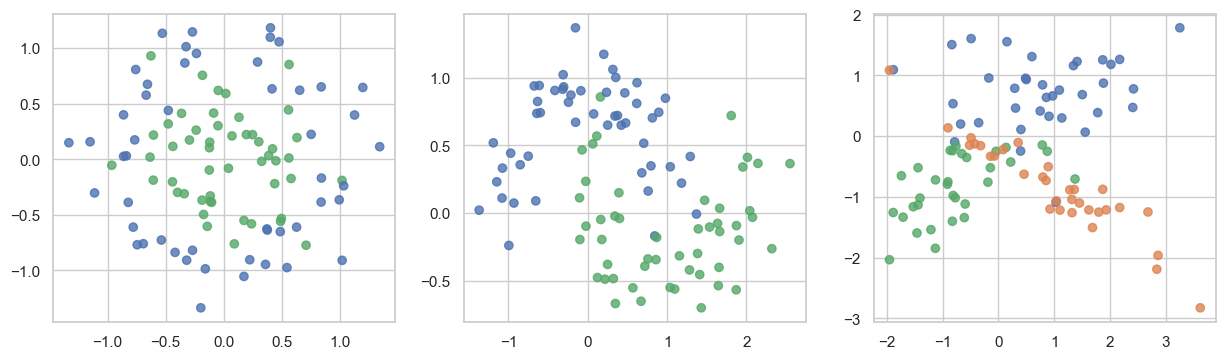

In [59]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [60]:
def plot_surface(clf, X, y, ax=None, title="Классификация"):
    if not ax:
        fig, ax = plt.subplots(1, 1)
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    ax.set_title(title)

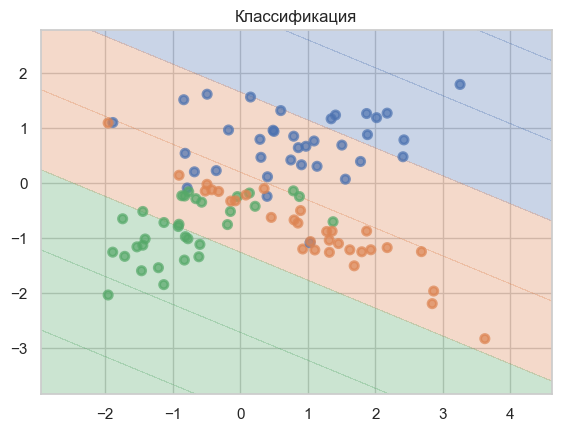

In [61]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)
plt.show()

Датасет: moons
Train score: 1.00
Test score: 0.90

Датасет: circles
Train score: 1.00
Test score: 0.80

Датасет: classification
Train score: 1.00
Test score: 0.90



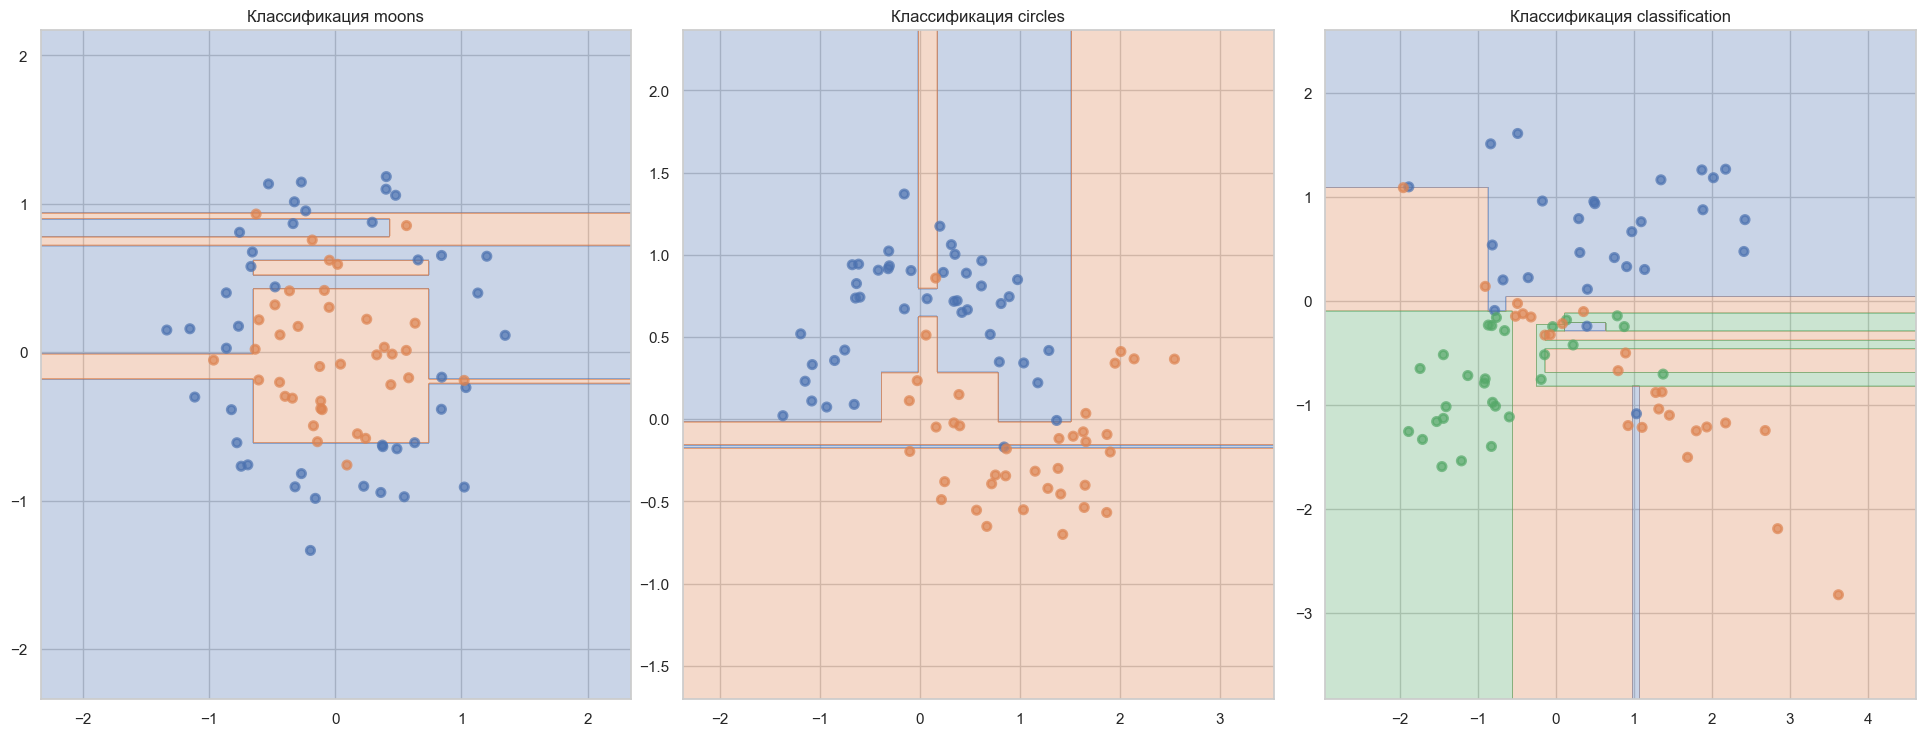

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

def accuracy(X, y_gt, clf):
    y_pred = clf.predict(X)
    return np.mean(y_pred == y_gt)

split_data = []
data_names = ["moons", "circles", "classification"]

for (X, y), name, ax in zip(datasets, data_names, axes):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=RANDOM_STATE, test_size=TEST_SIZE)
    split_data.append([X_train, X_test, y_train, y_test])
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
    clf.fit(X_train, y_train)
    plot_surface(clf, X_train, y_train, ax, title=f"Классификация {name}")
    print(f"Датасет: {name}")
    print(f"Train score: {accuracy(X_train, y_train, clf):.2f}")
    print(f"Test score: {accuracy(X_test, y_test, clf):.2f}")
    print()

plt.show()

__Ответ:__ Переобучение заметно, т.к имеем маленький датасет и, как видно, даже единичные экземпляры в группе другого класса выделились отдельной зоной, чего бы совсем не хотелось допускать

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

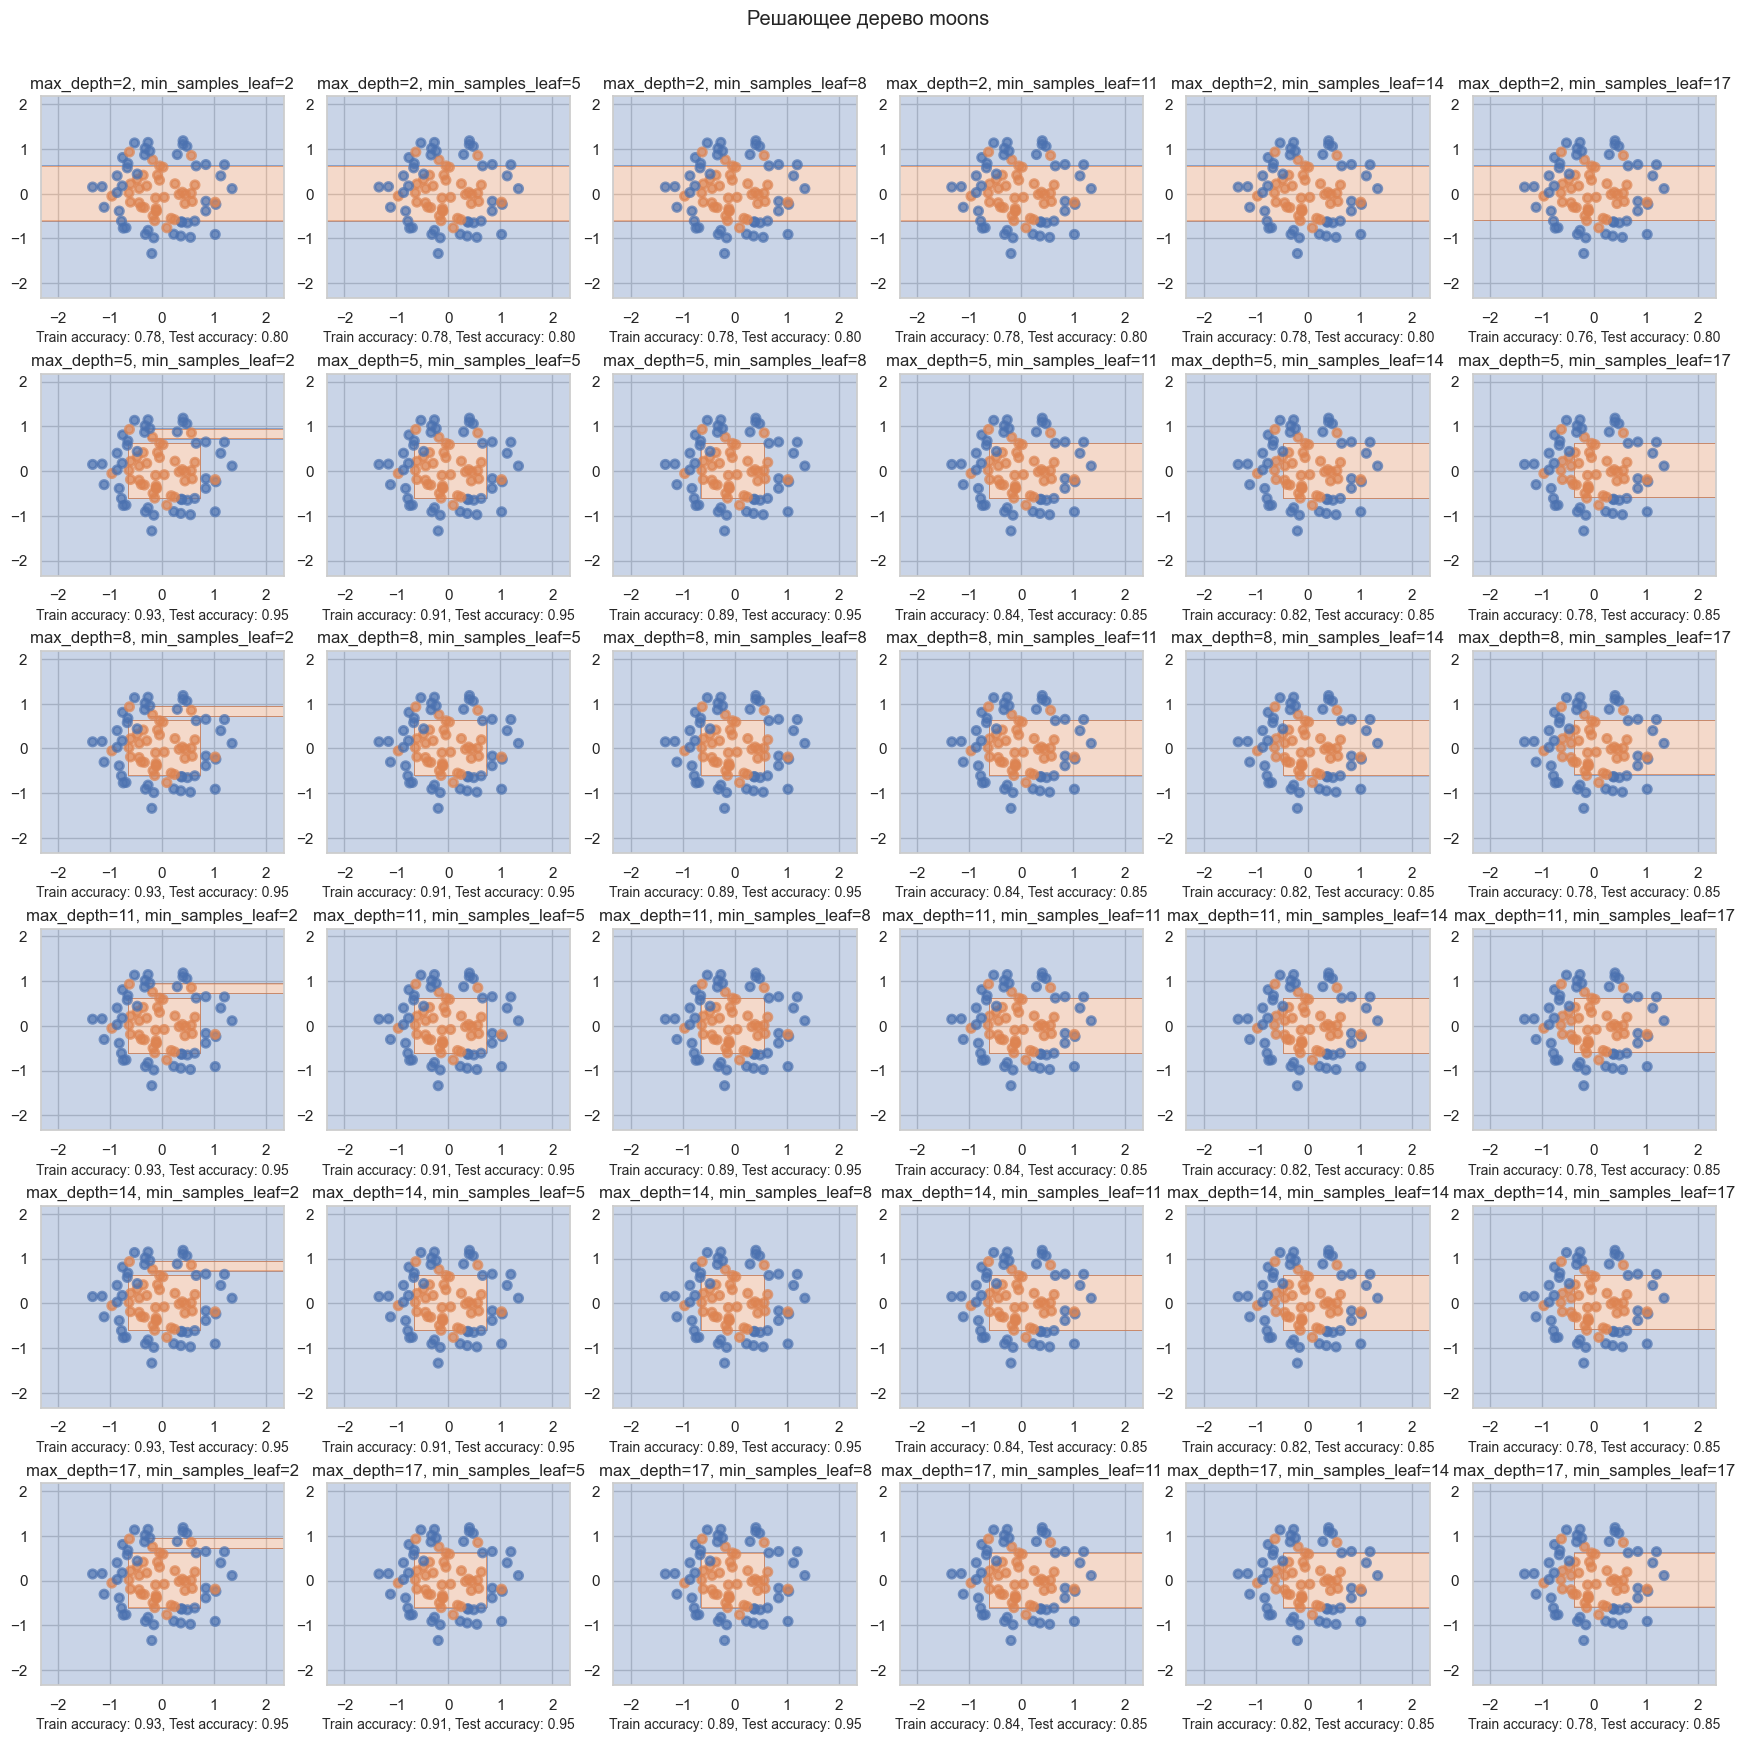

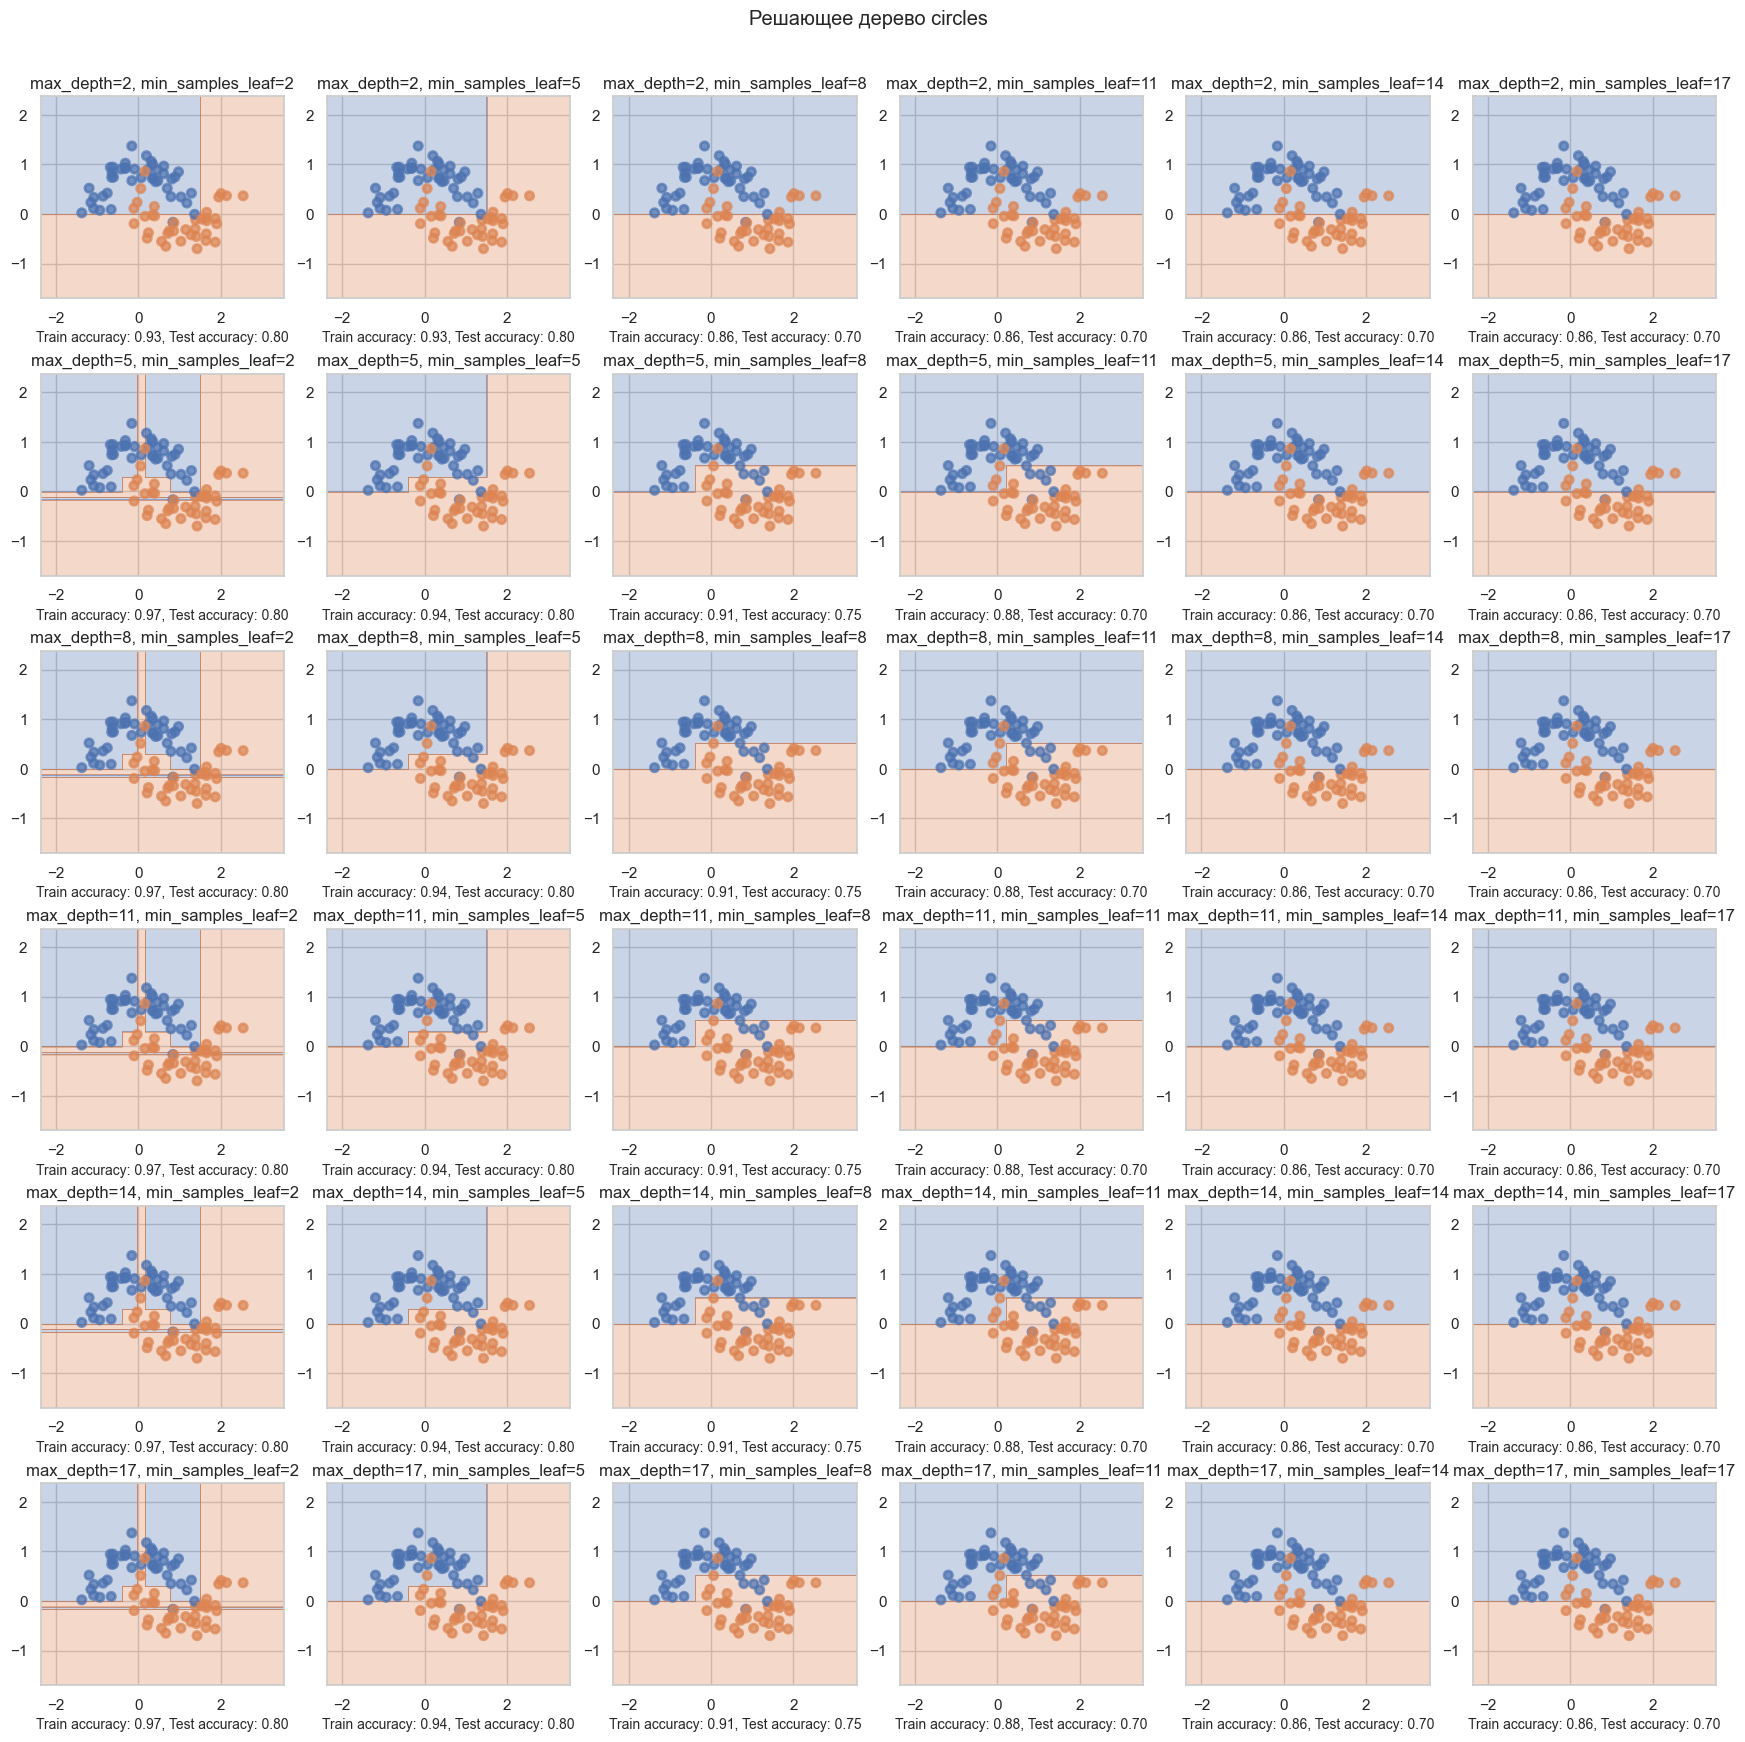

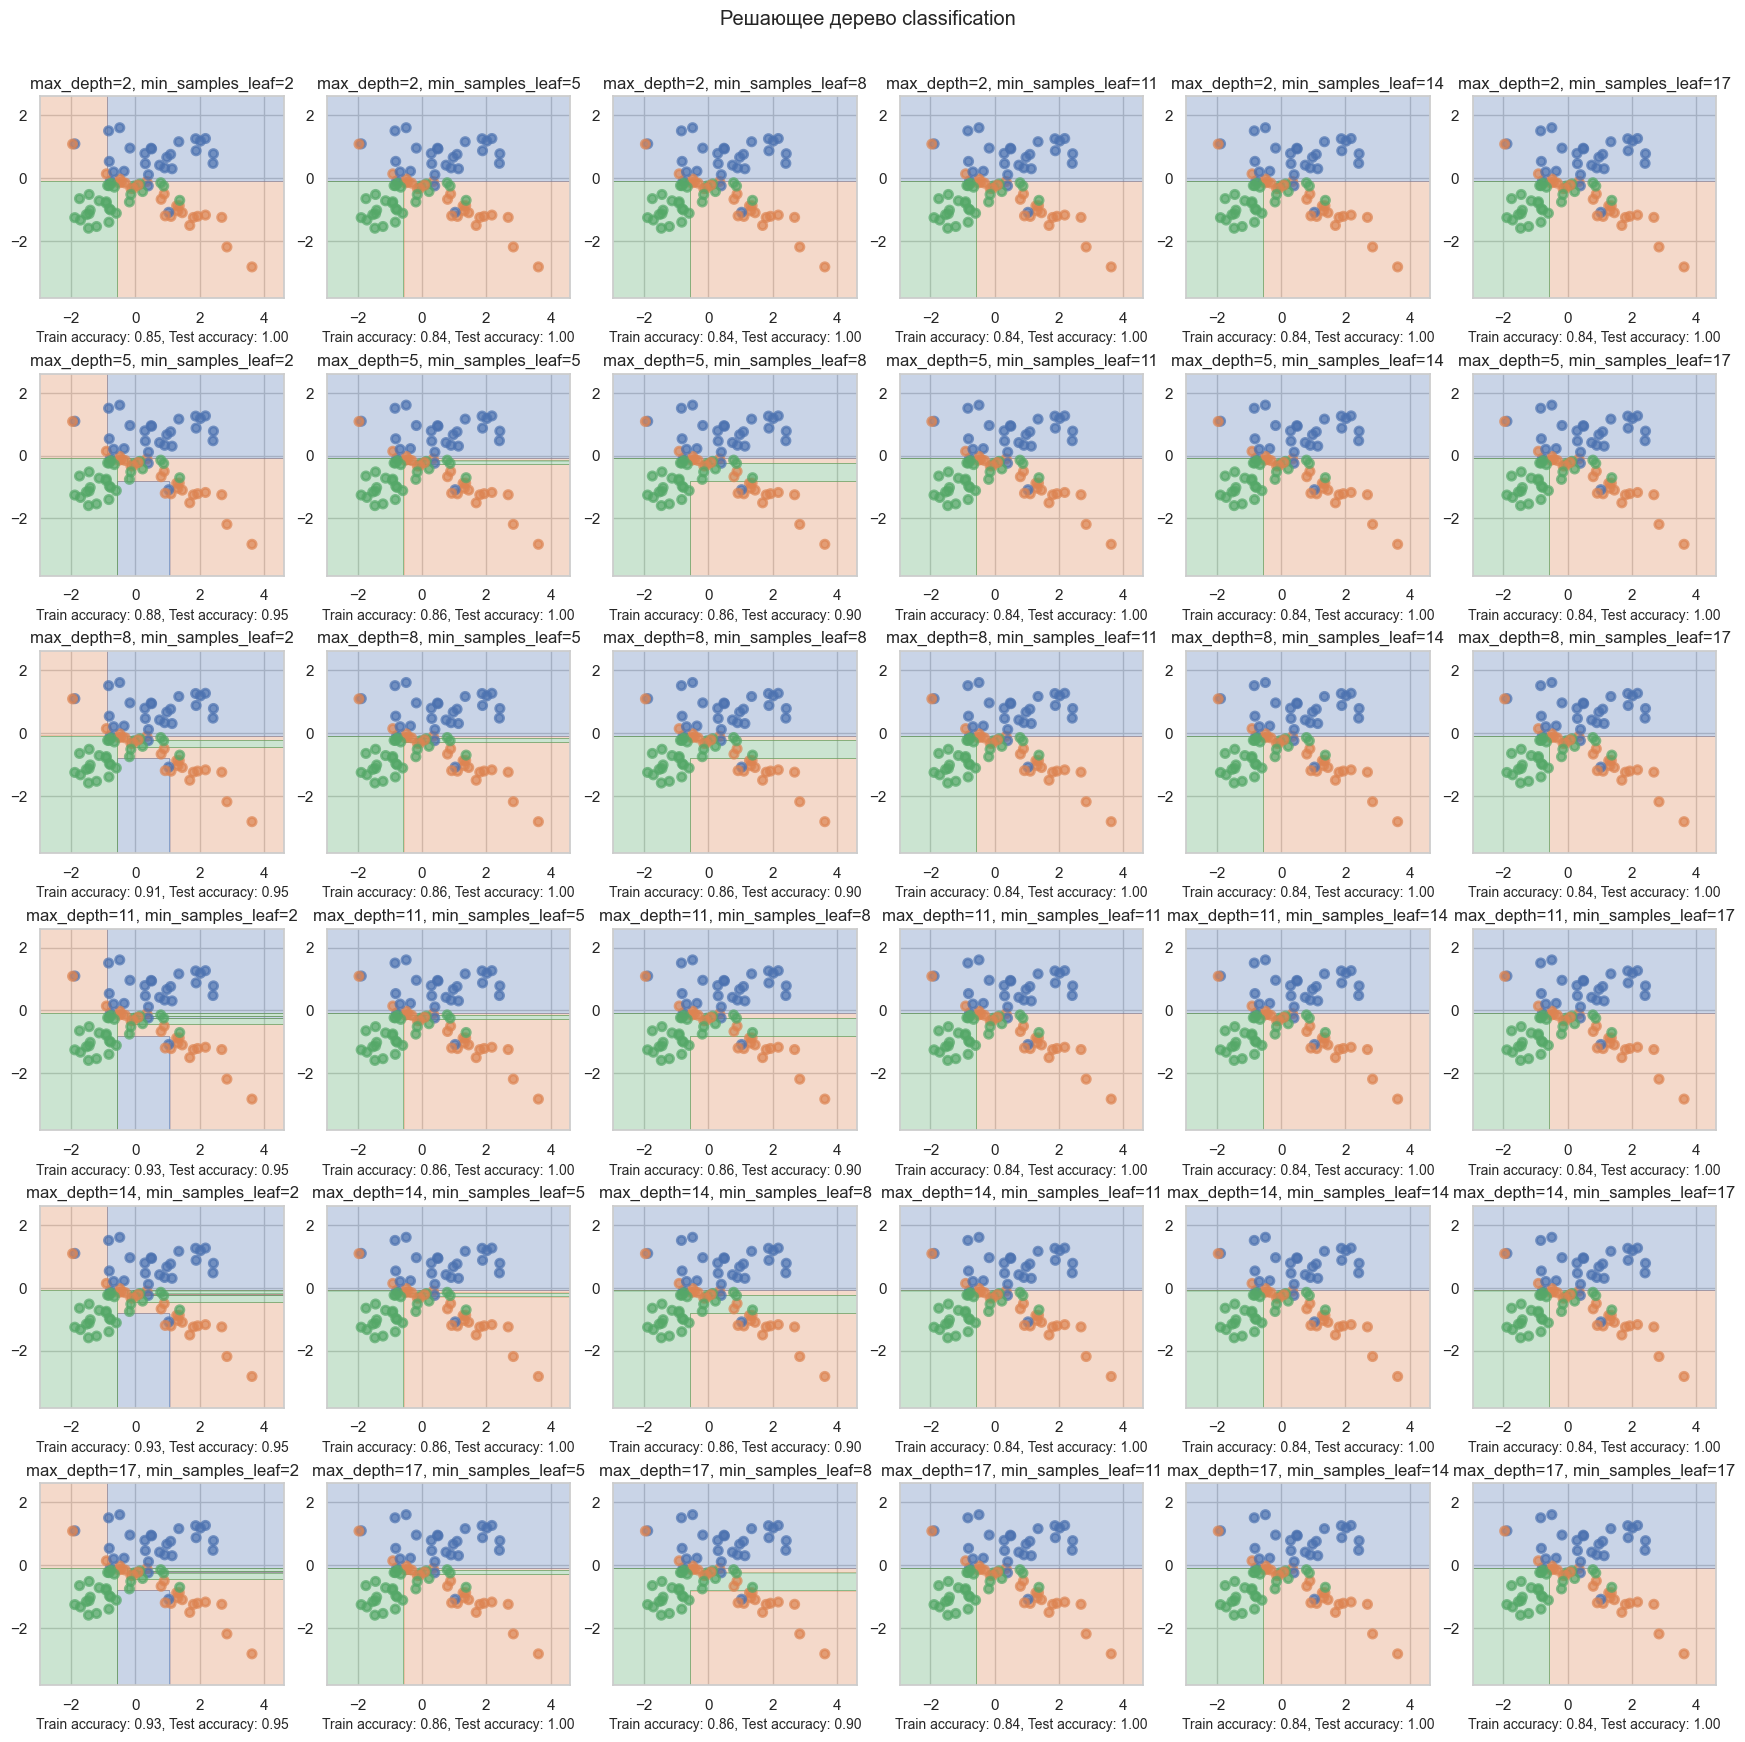

In [63]:
max_depth = np.arange(2, 20, 3)
min_samples_leaf = np.arange(2, 20, 3)

for (X_train, X_test, y_train, y_test), name in zip(split_data, data_names):
    fig, ax = plt.subplots(len(max_depth), len(min_samples_leaf), figsize=(18, 18))
    plt.tight_layout(h_pad=2, w_pad=2, pad=4)
    plt.suptitle(f"Решающее дерево {name}")
    for i, max_d in enumerate(max_depth):
        for j, min_s in enumerate(min_samples_leaf):
            clf = DecisionTreeClassifier(max_depth=max_d, min_samples_leaf=min_s, random_state=RANDOM_STATE)
            clf.fit(X_train, y_train)
            plot_surface(clf, X_train, y_train, ax[i][j], title=f"max_depth={max_d}, min_samples_leaf={min_s}")
            ax[i][j].set_xlabel(f"Train accuracy: {accuracy(X_train, y_train, clf):.2f}, Test accuracy: {accuracy(X_test, y_test, clf):.2f}", fontsize=10)
    
    plt.show()

__Ответ:__ При увеличении глубины дерева оно начинает переобучаться, начиная разделять плоскость на мелкие зоны. Увеличение минимального числа объектов в листе наоборот сглаживает всё, не создавая листья с маленьким количеством объектов выборки - мы не переобучаемся. Оптимум обобщающей способности будет где-то посередине. Но при этом, чем сложнее выборка, тем все же больше модельке нужно глубины, чтобы понять закономерность в данных.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [64]:
from hw5code import find_best_split

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [65]:
students = pd.read_csv("students.csv")
target = students.columns[-1]
features = students.columns[:-1]
students.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
5,0.09,0.15,0.40,0.10,0.66,1
6,0.10,0.10,0.43,0.29,0.56,1
7,0.15,0.02,0.34,0.40,0.01,0
8,0.20,0.14,0.35,0.72,0.25,0
9,0.00,0.00,0.50,0.20,0.85,1


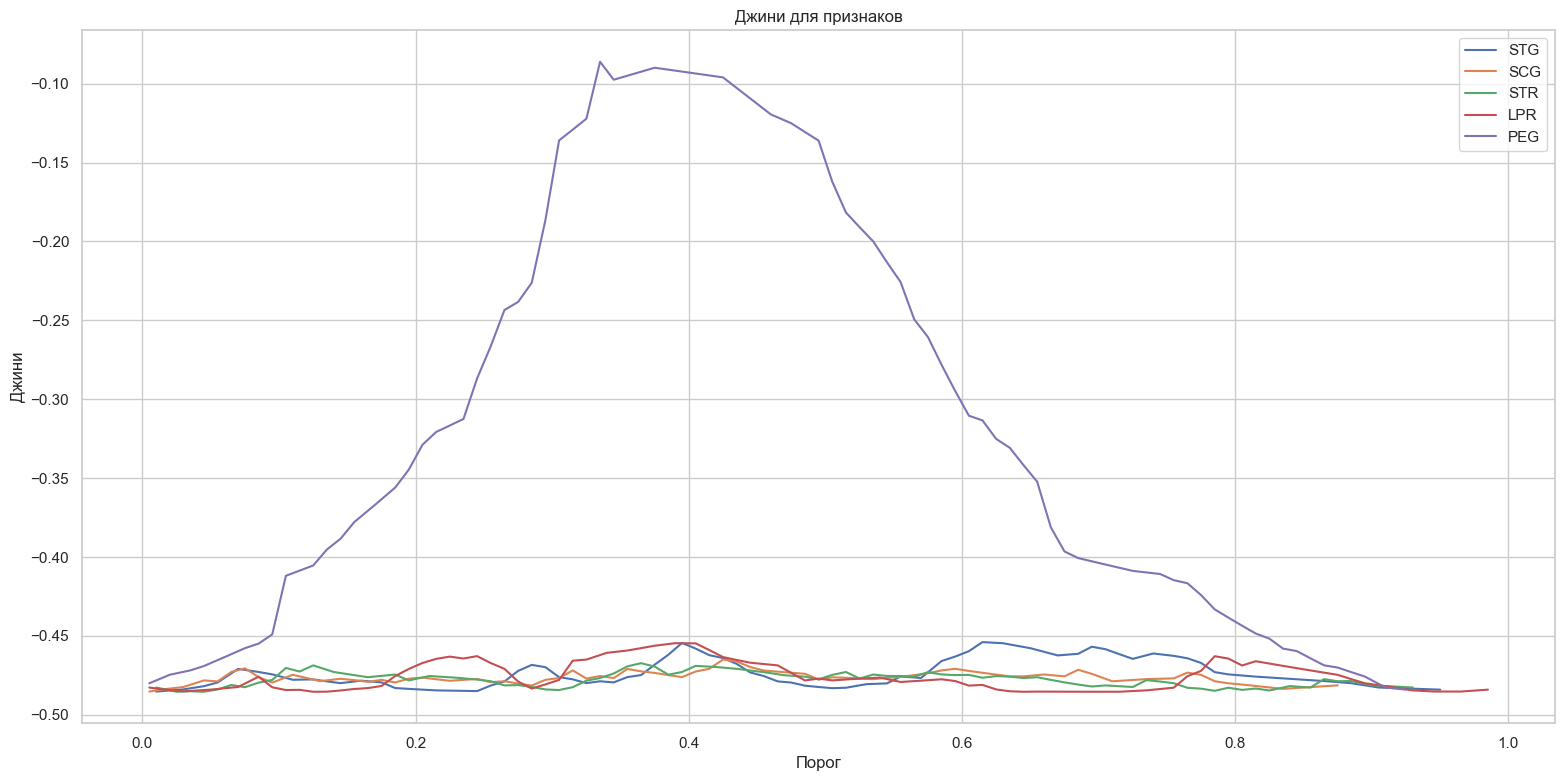

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(19, 9))

for feature in features:
    thresholds, ginis, threshold_best, gini_best = find_best_split(np.array(students[feature]), np.array(students[target]))
    ax.plot(thresholds, ginis, label=feature)

ax.set_title("Джини для признаков")
ax.legend(loc='best')
ax.set_ylabel("Джини")
ax.set_xlabel("Порог")

plt.show()

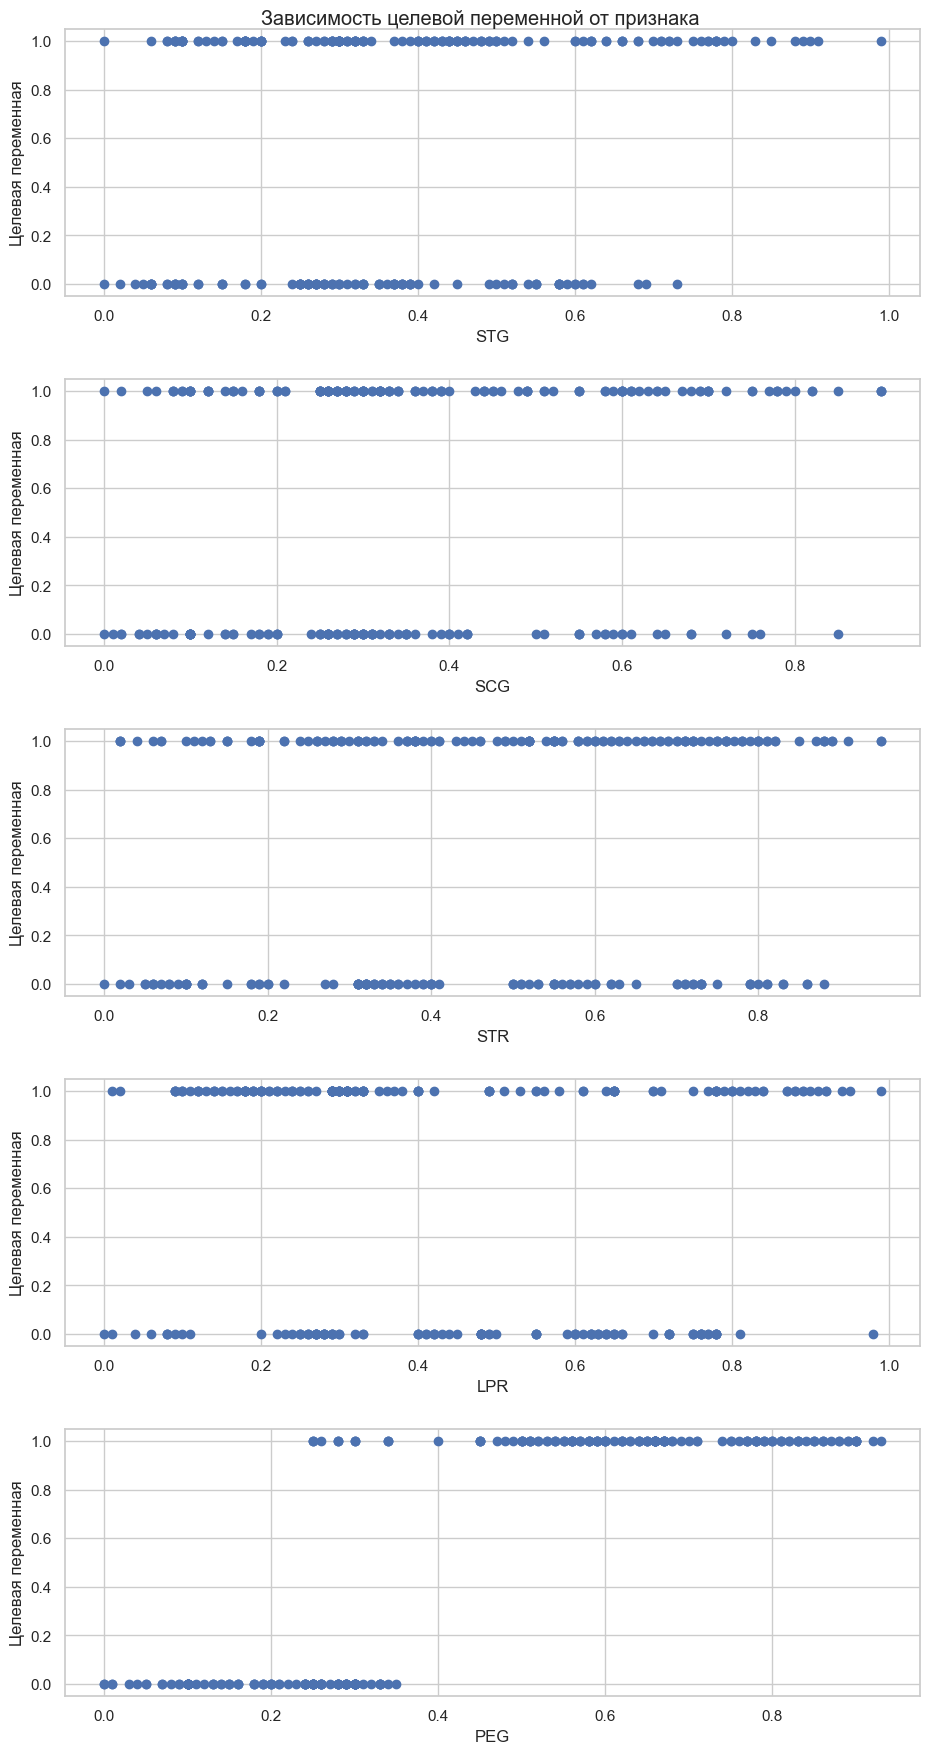

In [67]:
fig, ax = plt.subplots(5, 1, figsize=(10, 18))
plt.tight_layout(pad=3)

for i, feature in enumerate(features):
    ax[i].scatter(students[feature], students[target])
    ax[i].set_ylabel("Целевая переменная")
    ax[i].set_xlabel(f"{feature}")

plt.suptitle("Зависимость целевой переменной от признака")
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Делить нужно по PEG - тогда зашумленность будет наименьшей. Распределения фичей это подтверждает - процент случаев, когда разный таргет, но одинаковое значение фичи - меньше 20.
Кривая выпуклая и имеет один экстремум - если чуть сгладить, то она будет идеально похожа на нормальное распределение. У остальных признаков прямые близки к зашумлённой константе. Идеально выпуклый вид по сути означает, что можно сделать бинарный поиск, найдя то значение признака, меньше которого все объекты относятся к 0-му классу, а больше - к 1-му. В реальности данные почти всегда линейно неразделимы в силу большого числа факторов и тд, поэтому мы находим лучшую такую точку, разбивающую выборку.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [68]:
from hw5code import DecisionTree as MyDecisionTree
from sklearn.preprocessing import LabelEncoder

mushrooms = pd.read_csv("agaricus-lepiota.data", header=None)
mushrooms.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [69]:
mushrooms = mushrooms.apply(LabelEncoder().fit_transform)
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [70]:
X, y = np.array(mushrooms)[:, 1:], np.array(mushrooms)[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=RANDOM_STATE, test_size=TEST_SIZE)

clf = MyDecisionTree(["categorical"] * 22)
clf.fit(X_train, y_train)

print(f"Train score: {accuracy(X_train, y_train, clf):.2f}")
print(f"Test score: {accuracy(X_test, y_test, clf):.2f}")

Train score: 1.00
Test score: 1.00


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [71]:
tic_tac_toe = pd.read_csv("tic-tac-toe-endgame.csv")
tic_tac_toe.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [72]:
tic_tac_toe = tic_tac_toe.apply(LabelEncoder().fit_transform)
tic_tac_toe.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [73]:
X, y = np.array(tic_tac_toe)[:, :-1], LabelEncoder().fit_transform(np.array(tic_tac_toe)[:, -1])
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=RANDOM_STATE, test_size=TEST_SIZE)

clf = MyDecisionTree(["categorical"] * 9)
clf.fit(X_train, y_train)

print(f"Train score: {accuracy(X_train, y_train, clf):.2f}")
print(f"Test score: {accuracy(X_test, y_test, clf):.2f}")

Train score: 1.00
Test score: 0.96


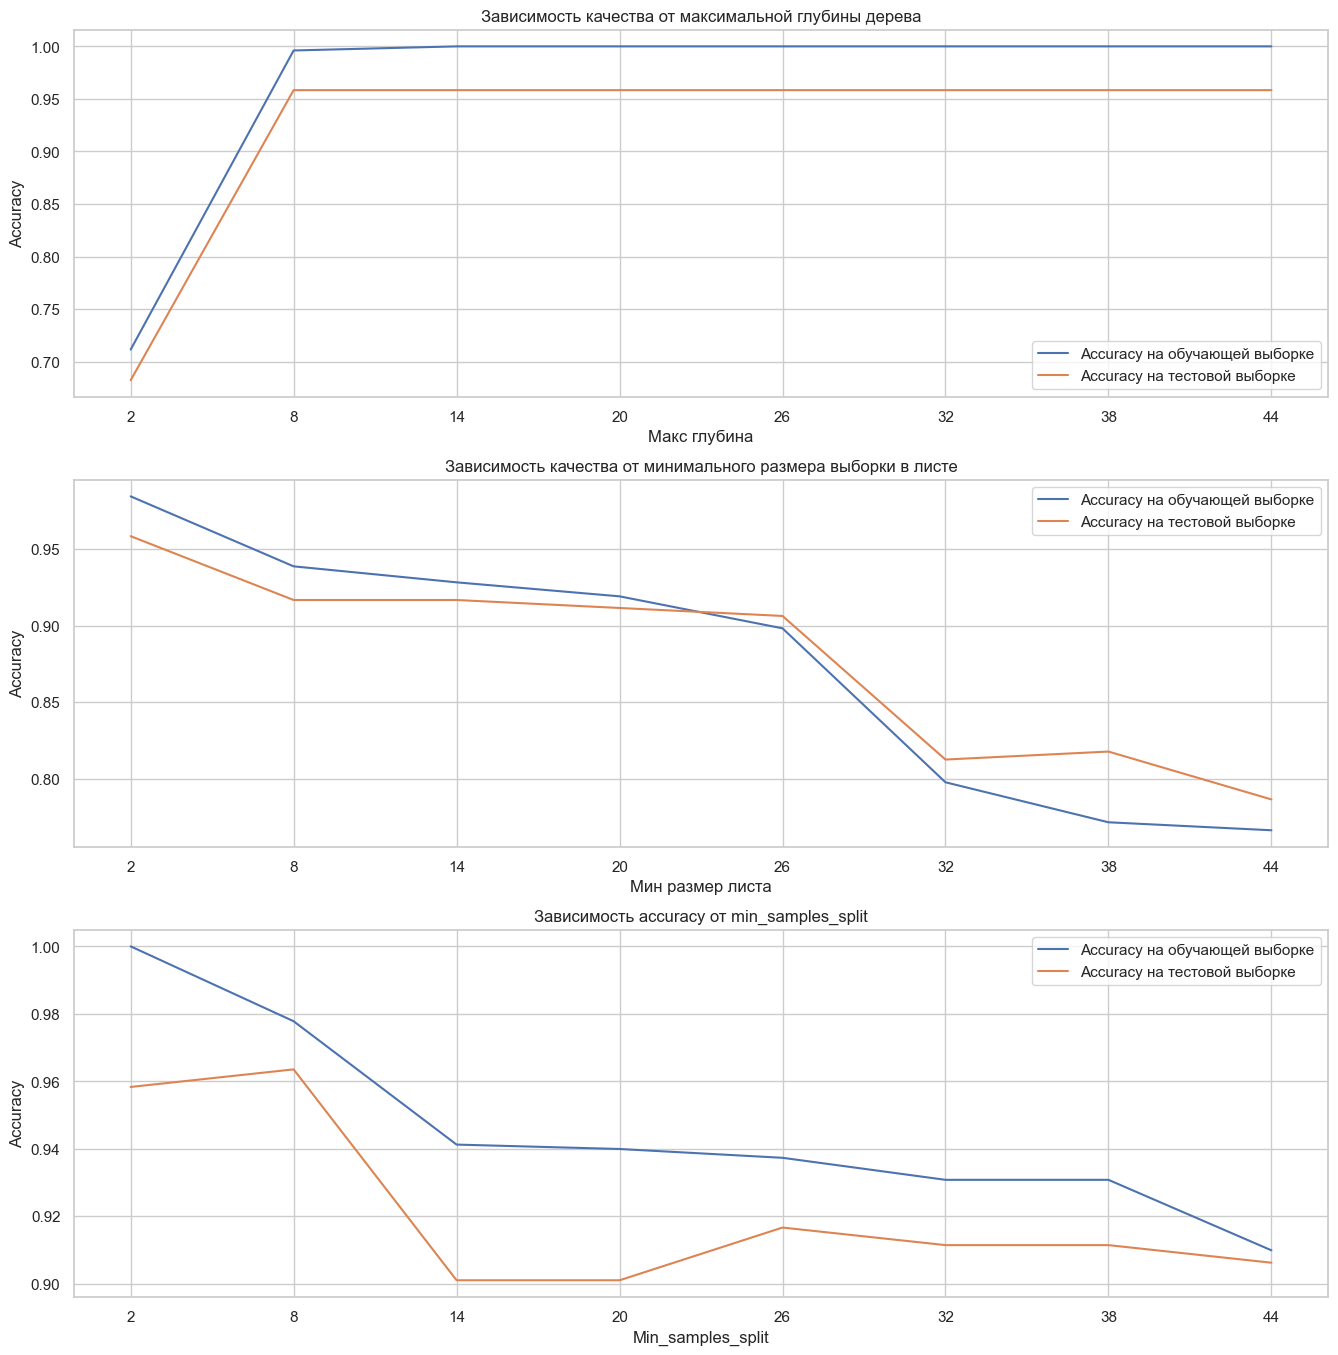

In [74]:
max_depth = np.arange(2, 50, 6)
min_samples_leaf = np.arange(2, 50, 6)
min_samples_split = np.arange(2, 50, 6)

fig, ax = plt.subplots(3, 1, figsize=(14, 14))
plt.tight_layout(pad=3)

train_acc = []
test_acc = []
for depth in max_depth:
    clf = MyDecisionTree(["categorical"] * 9, max_depth=depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy(X_train, y_train, clf))
    test_acc.append(accuracy(X_test, y_test, clf))

ax[0].plot(train_acc, label="Accuracy на обучающей выборке")
ax[0].plot(test_acc, label="Accuracy на тестовой выборке")
ax[0].set_title("Зависимость качества от максимальной глубины дерева")
ax[0].set_xlabel("Макс глубина")
ax[0].set_ylabel("Accuracy")
ax[0].set_xticks(ticks=list(range(len(max_depth))), labels=max_depth)
ax[0].legend(loc='best')


train_acc = []
test_acc = []
for min_samples in min_samples_leaf:
    clf = MyDecisionTree(["categorical"] * 9, min_samples_leaf=min_samples)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy(X_train, y_train, clf))
    test_acc.append(accuracy(X_test, y_test, clf))

ax[1].plot(train_acc, label="Accuracy на обучающей выборке")
ax[1].plot(test_acc, label="Accuracy на тестовой выборке")
ax[1].set_title("Зависимость качества от минимального размера выборки в листе")
ax[1].set_xlabel("Мин размер листа")
ax[1].set_ylabel("Accuracy")
ax[1].set_xticks(ticks=list(range(len(min_samples_leaf))), labels=min_samples_leaf)
ax[1].legend(loc='best')


train_acc = []
test_acc = []
for min_samples in min_samples_split:
    clf = MyDecisionTree(["categorical"] * 9, min_samples_split=min_samples)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy(X_train, y_train, clf))
    test_acc.append(accuracy(X_test, y_test, clf))

ax[2].plot(train_acc, label="Accuracy на обучающей выборке")
ax[2].plot(test_acc, label="Accuracy на тестовой выборке")
ax[2].set_title("Зависимость accuracy от min_samples_split")
ax[2].set_xlabel("Min_samples_split")
ax[2].set_ylabel("Accuracy")
ax[2].set_xticks(ticks=list(range(len(min_samples_split))), labels=min_samples_split)
ax[2].legend(loc='best')

plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [75]:
from sklearn.datasets import fetch_california_housing
from hw5code import LinearRegressionTree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

df = fetch_california_housing()
X, y = df.data, df.target

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [5, 10, 15],
}

best_params = None
best_mse = np.inf

for max_depth in tqdm(param_grid["max_depth"], desc="Max Depth"):
    for min_samples_split in param_grid["min_samples_split"]:
        for min_samples_leaf in param_grid["min_samples_leaf"]:
            linear_tree = LinearRegressionTree(
                feature_types=["real"] * X.shape[1],
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                loss="mse"
            )
            linear_tree.fit(X_train, y_train)
            y_pred = linear_tree.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_params = {
                    "max_depth": max_depth,
                    "min_samples_split": min_samples_split,
                    "min_samples_leaf": min_samples_leaf,
                }
print("Best parameters for our tree:", best_params)
print("Best MSE for our tree:", best_mse)

Max Depth: 100%|██████████| 3/3 [00:56<00:00, 18.72s/it]

Best parameters for our tree: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 15}
Best MSE for our tree: 0.3571034797998772


In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [5, 10, 15]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_squared_error"
)
grid_search.fit(X_train, y_train)

best_params_sklearn_tree = grid_search.best_params_
best_mse_sklearn_tree = -grid_search.best_score_
test_mse_sklearn = mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test))

print("best params for sklearn:", best_params_sklearn_tree)
print("best val mse for sklearn:", best_mse_sklearn_tree)
print("best test mse for sklearn:", test_mse_sklearn)

best params for sklearn: {'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 5}
best val mse for sklearn: 0.4508607226610037
best test mse for sklearn: 0.451849498954866


Дерево медленее учится, но предсказания выдаются получше

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [77]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

linear_tree = LinearRegressionTree(
    feature_types=["real"] * x.shape[1],
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=15,
    loss="mse"
)
linear_tree.fit(x_train, y_train)
y_pred_linear_tree = linear_tree.predict(x)

regressor_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)
regressor_tree.fit(x_train, y_train)
y_pred_regressor_tree = regressor_tree.predict(x)

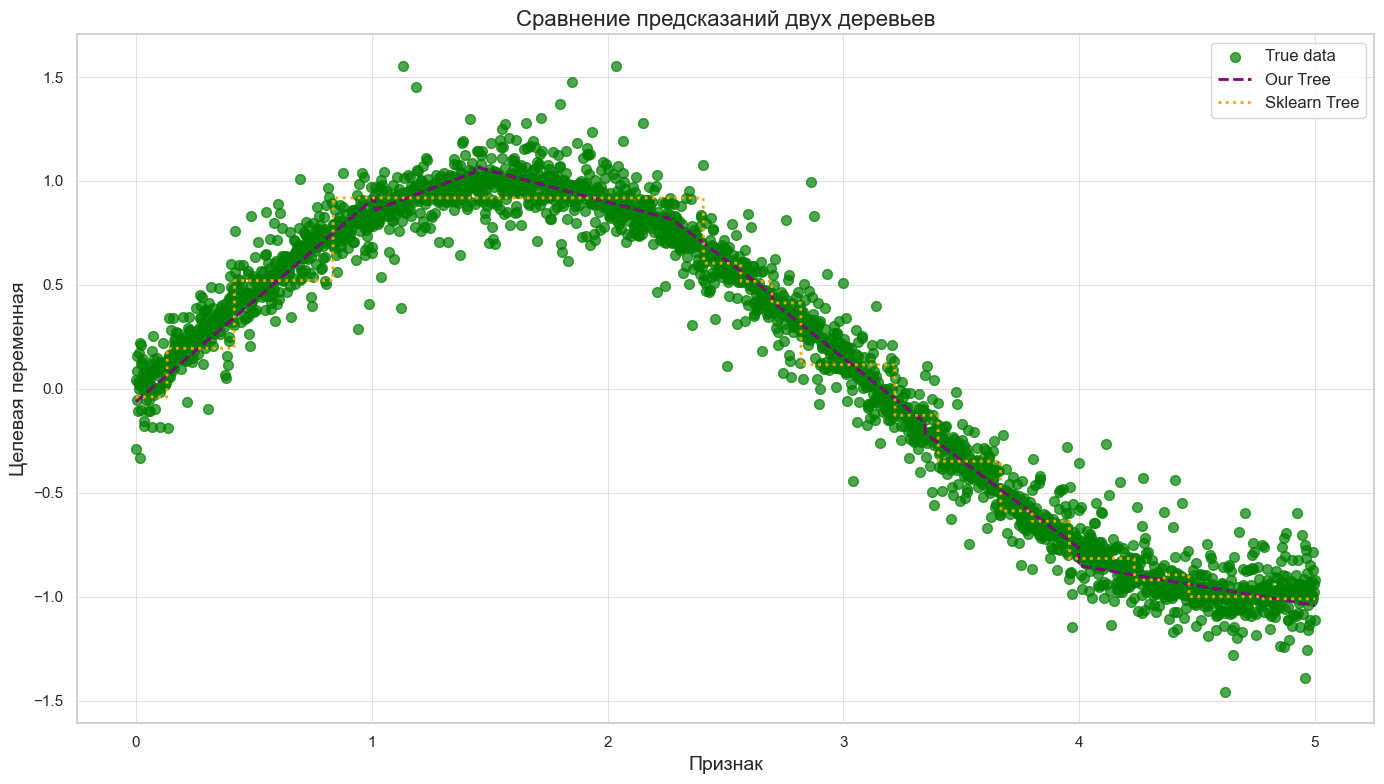

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

scatter = ax.scatter(x, y, color='green', alpha=0.7, s=50, label="True data")
line1, = ax.plot(x, y_pred_linear_tree, color='purple', linewidth=2, linestyle='--', label="Our Tree")
line2, = ax.plot(x, y_pred_regressor_tree, color='orange', linewidth=2, linestyle=':', label="Sklearn Tree")

ax.set_title("Сравнение предсказаний двух деревьев", fontsize=16)
ax.set_xlabel("Признак", fontsize=14)
ax.set_ylabel("Целевая переменная", fontsize=14)
ax.legend(fontsize=12)
ax.grid(visible=True, which="major", linestyle='-', linewidth=0.5, color='lightgray')
plt.tight_layout()
plt.show()

Можно наблюдать, как регрессоры влияют на поведение модели в листьях. В линейном дереве предсказание формируется под углом, поэтому разделяющая линия тоже идет под углом. В отличие от этого, у обычного дерева разделяющие линии всегда либо горизонтальные, либо вертикальные. Думаю, если рассматривать задачу классификации, то разделяющая плоскость в линейном дереве тоже будет формироваться под разными углами. Однако есть предположение, что дерево плохо справляется с экстраполяцией данных.

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

![title](picture.jpg)